In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [170]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [171]:
df.shape

(21613, 21)

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [173]:
df.apply(pd.isnull).sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [174]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [175]:
x1 = df['sqft_living']
y = df['price']

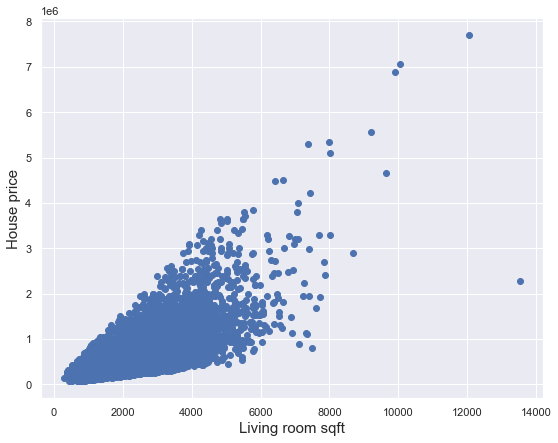

In [176]:
plt.figure(figsize = (9, 7))
plt.scatter(x1, y)
plt.xlabel('Living room sqft', fontsize = 15)
plt.ylabel('House price', fontsize = 15)
plt.show()

In [177]:
x = sm.add_constant(x1)
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Fri, 06 Sep 2024   Prob (F-statistic):               0.00
Time:                        01:53:26   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
sqft_living   280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

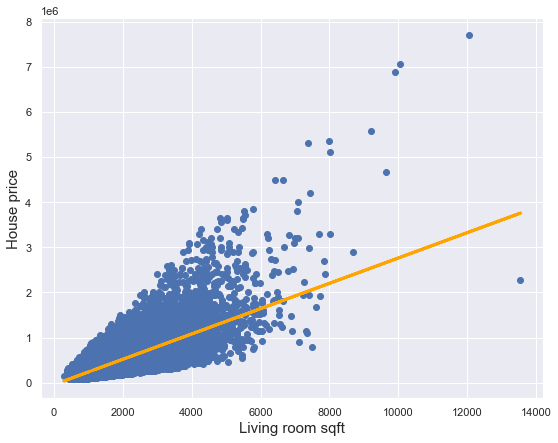

In [178]:
plt.figure(figsize = (9, 7))
plt.scatter(x1, y)
yhat = 280.62 * x1 - 43580
fig = plt.plot(x1, yhat, lw = 3, c = 'orange')
plt.xlabel('Living room sqft', fontsize = 15)
plt.ylabel('House price', fontsize = 15)
plt.show()

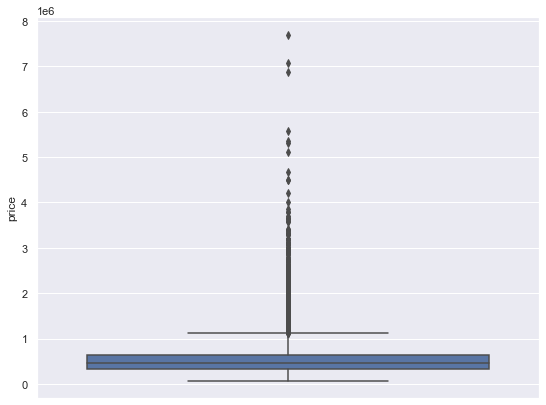

In [179]:
plt.figure(figsize = (9, 7))
sns.boxplot(data = df, y = 'price')
plt.show()

In [180]:
df[df['price'] > 1100000].shape

(1190, 21)

In [181]:
df = df[df['price'] < 1100000]

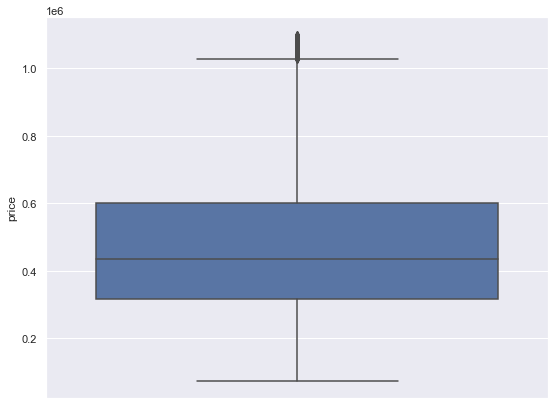

In [182]:
plt.figure(figsize = (9, 7))
sns.boxplot(data = df, y = 'price')
plt.show()

In [183]:
df[df['price'] > 1000000].shape

(246, 21)

In [184]:
df = df[df['price'] < 1000000]

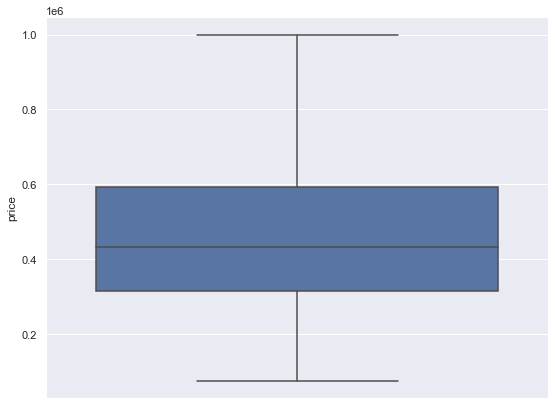

In [185]:
plt.figure(figsize = (9, 7))
sns.boxplot(data = df, y = 'price')
plt.show()

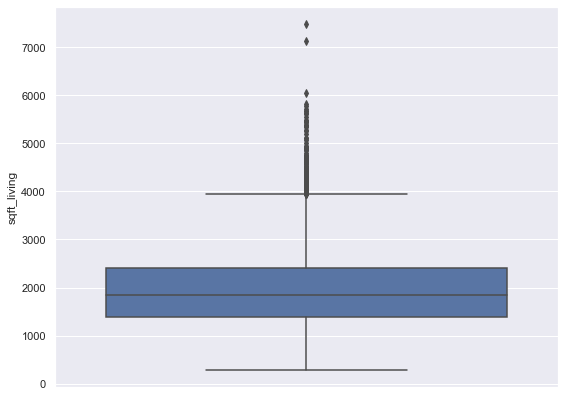

In [186]:
plt.figure(figsize = (9, 7))
sns.boxplot(data = df, y = 'sqft_living')
plt.show()

In [187]:
df[df['sqft_living'] > 3800].shape

(376, 21)

In [188]:
df = df[df['sqft_living'] < 3800]

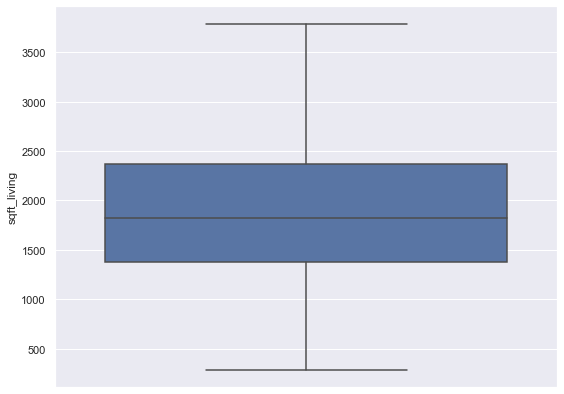

In [189]:
plt.figure(figsize = (9, 7))
sns.boxplot(data = df, y = 'sqft_living')
plt.show()

In [190]:
df.shape

(19736, 21)

In [191]:
x_n = df['sqft_living']
y_n = df['price']

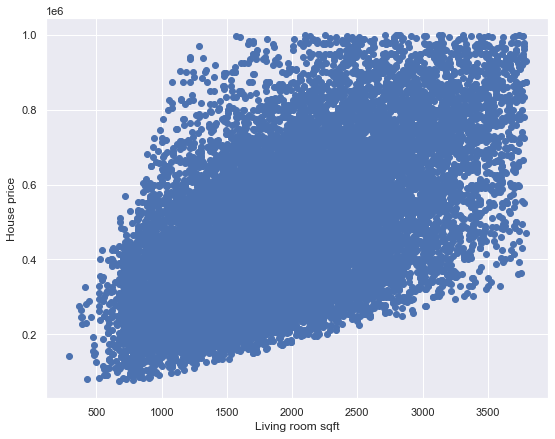

In [192]:
plt.figure(figsize = (9, 7))
plt.scatter(x_n, y_n)
plt.xlabel('Living room sqft')
plt.ylabel('House price')
plt.show()

In [193]:
x1_n = sm.add_constant(x_n)
model = sm.OLS(y_n, x1_n).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                 1.017e+04
Date:                Fri, 06 Sep 2024   Prob (F-statistic):               0.00
Time:                        01:53:28   Log-Likelihood:            -2.6391e+05
No. Observations:               19736   AIC:                         5.278e+05
Df Residuals:                   19734   BIC:                         5.278e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.517e+05   3259.836     46.537      0.000    1.45e+05    1.58e+05
sqft_living   161.9364      1.606    100.831      0.000     158.788     165.084
==============================================================================
Omnibus:                      695.460   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              770.438
Skew:                           0.483   Prob(JB):                    5.03e-168
Kurtosis:                       2.934   Cond. No.                     5.98e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [194]:
y_hat2 = 161.93 * x_n + 151700

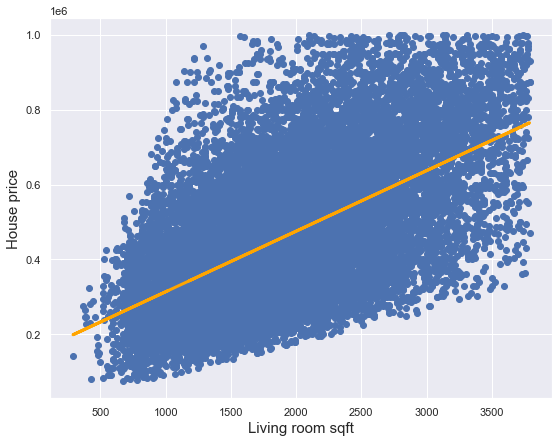

In [198]:
plt.figure(figsize = (9, 7))
plt.scatter(x_n, y_n)
fig = plt.plot(x_n, y_hat2, lw = 3, c = 'orange')
plt.xlabel('Living room sqft', fontsize = 15)
plt.ylabel('House price', fontsize = 15)
plt.show()